## PROBLEM STATEMENT
Absenteeism is a habitual pattern of absence from a duty or obligation without good reason. Generally, absenteeism is unplanned absences. If a workplace exhibits a high degree of absenteeism there is a problem. It has been viewed as an indicator of poor individual performance, as well as a breach of an implicit contract between employee and employer.

### Data Set Name:
Analysis of absenteeism in a company
### Abstract:
The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier
company in Brazil.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns

## Attribute Information:
1. Individual identification (ID)
2. Reason for absence (ICD).
- Absences attested by the International Code of Diseases (ICD) stratified into 21 categories as follows:<br>
> 1. Certain infectious and parasitic diseases
> 2. Neoplasms
> 3. Diseases of the blood and blood-forming organs and certain disorders involving the immune
mechanism
> 4. Endocrine, nutritional and metabolic diseases
> 5. Mental and behavioral disorders
> 6. Diseases of the nervous system
> 7. Diseases of the eye and adnexa
> 8. Diseases of the ear and mastoid process
> 9. Diseases of the circulatory system
> 10. Diseases of the respiratory system
> 11. Diseases of the digestive system
> 12. Diseases of the skin and subcutaneous tissue
> 13. Diseases of the musculoskeletal system and connective tissue
> 14. Diseases of the genitourinary system
> 15. Pregnancy, childbirth and the puerperium
> 16. Certain conditions originating in the perinatal period
> 17. Congenital malformations, deformations and chromosomal abnormalities
> 18. Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
> 19. Injury, poisoning and certain other consequences of external causes
> 20. External causes of morbidity and mortality
> 21. Factors influencing health status and contact with health services.<br>
> And 7 categories without (ICD), patient follow-up (22), medical consultation (23), blood donation (24),
laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence<br>
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)

In [2]:
data = pd.read_csv("/kaggle/input/cascade-cup-absenteesim-at-work/Absenteeism_at_work.csv", sep=';')
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


### REASON FOR ABSENCE - NUMBER OF EMPLOYEE WISE

In [3]:
counts = data['Reason for absence'].value_counts(sort=True)
labels = counts.index
values = counts.values

pie = go.Pie(labels=labels, values=values, marker=dict(colors=px.colors.qualitative.Pastel+px.colors.qualitative.Pastel1+px.colors.qualitative.Pastel2))
layout = go.Layout(title='NUMBER OF EMPLOYEES PER REASON FOR ABSENCE')

fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

In [4]:
reason_mapping = {
    0: 'Unknown',
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up',
    23: 'Medical consultation',
    24: 'Blood donation',
    25: 'Laboratory examination',
    26: 'Unjustified absence',
    27: 'Physiotherapy',
    28: 'Dental consultation'
}
data['reason_text'] = data['Reason for absence'].map(reason_mapping)
ds = data['reason_text'].value_counts(ascending=True).reset_index()
ds.columns = [
    'reason_text', 
    'Count'
]
fig = px.bar(
    ds, 
    x='Count', 
    y='reason_text', 
    orientation='h', 
    title='NUMBER OF EMPLOYEES PER REASON FOR ABSENCE', 
    width=900,
    height=800,
    color_discrete_sequence=px.colors.qualitative.Pastel,
    template="plotly_dark"
)

fig.show()

### REASON FOR ABSENCE - ABSENTEEISM TIME WISE

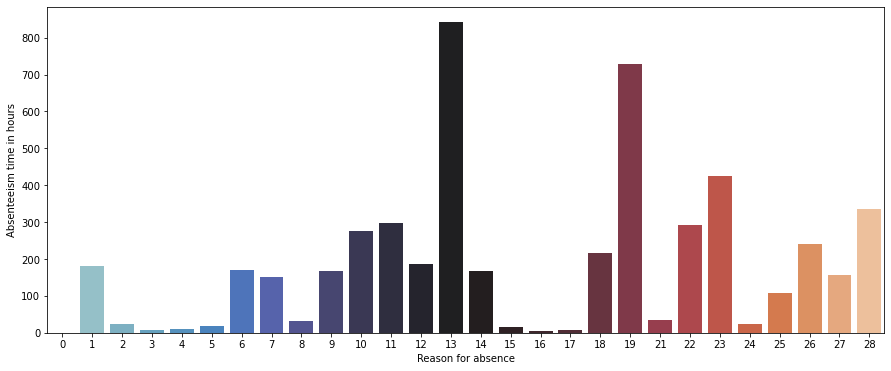

In [5]:
plt.figure(figsize = (15,6))
sns.barplot(data.groupby(['Reason for absence'])['Absenteeism time in hours'].sum().index, 
            data.groupby(['Reason for absence'])['Absenteeism time in hours'].sum(), palette="icefire")
plt.show()

### ABSENTEEISM TIME PER DAY OF THE WEEK AND PER MONTH

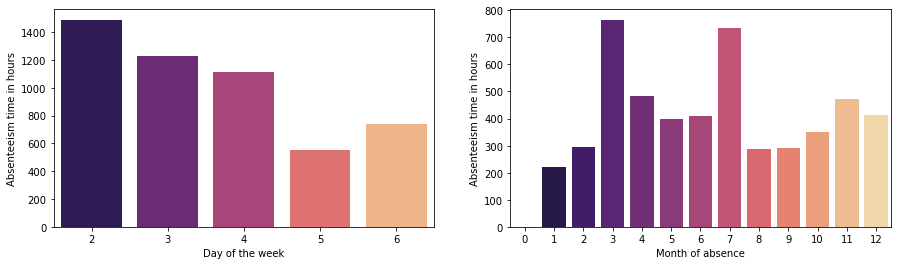

In [6]:
plt.figure(figsize = (15,4))
plt.subplot(1, 2, 1)
sns.barplot(data.groupby(['Day of the week'])['Absenteeism time in hours'].sum().index, 
            data.groupby(['Day of the week'])['Absenteeism time in hours'].sum(), palette="magma")
plt.subplot(1, 2, 2)
sns.barplot(data.groupby(['Month of absence'])['Absenteeism time in hours'].sum().index, 
            data.groupby(['Month of absence'])['Absenteeism time in hours'].sum(), palette="magma")
plt.show()

### ABSENTEEISM TIME PER MONTH AND DAY OF THE WEEK

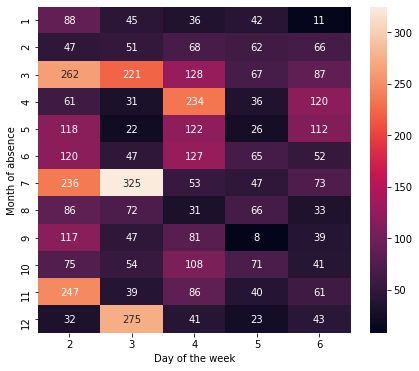

In [7]:
plt.figure(figsize = (7,6))
sns.heatmap(data.groupby(['Month of absence', 'Day of the week'])['Absenteeism time in hours'].sum().unstack()[1:13], 
            annot = True, fmt = 'g')
plt.show()

### ABSENTEEISM TIME PER WORKLOAD AVG/DAY AND AGE

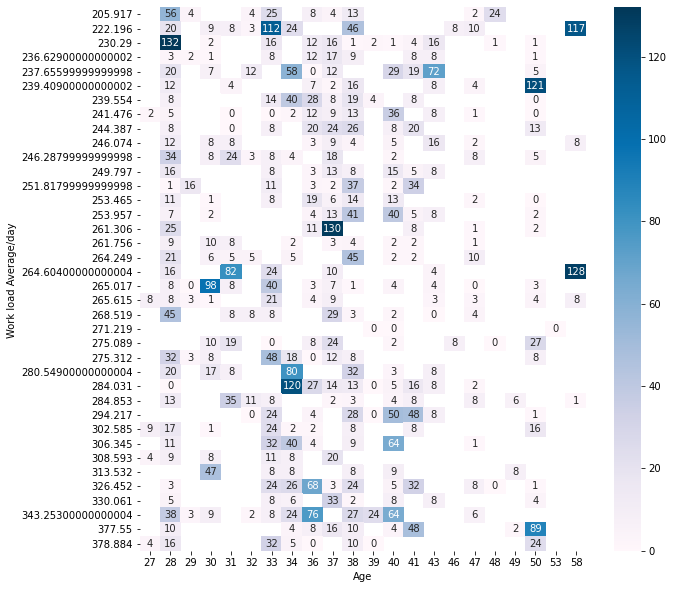

In [8]:
plt.figure(figsize = (10, 10))
sns.heatmap(data[data['Age'] != 0].groupby(['Work load Average/day ', 'Age'])['Absenteeism time in hours'].sum().unstack(),  
            annot = True, fmt = 'g', cmap="PuBu")
plt.show()

### ABSENTEEISM TIME PER SEASON AND REASON

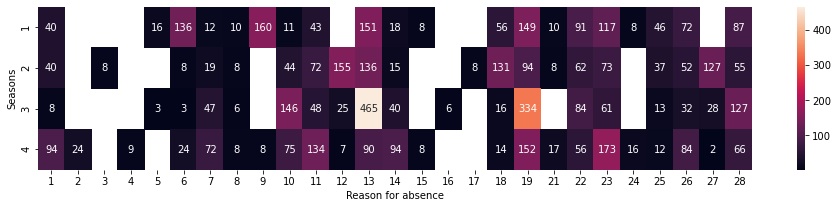

In [9]:
plt.figure(figsize = (16, 3))
sns.heatmap(data[data['Reason for absence'] != 0].groupby(['Seasons', 'Reason for absence'])['Absenteeism time in hours'].sum().unstack(),
            annot = True, fmt = 'g')
plt.show() 

### ABSENTEEISM TIME PER MONTH AND REASON

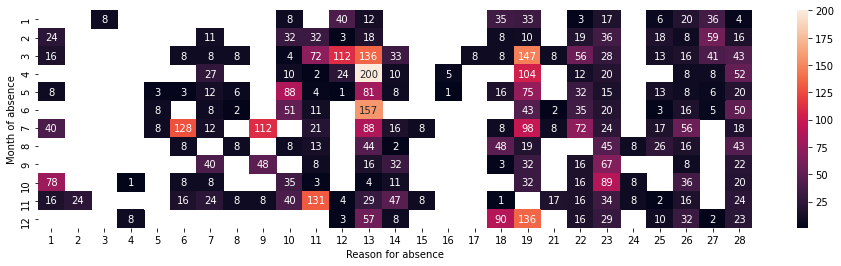

In [10]:
plt.figure(figsize = (16, 4))
sns.heatmap(data[data['Reason for absence'] != 0].groupby(['Month of absence', 'Reason for absence'])['Absenteeism time in hours'].sum().unstack(),  
            annot = True, fmt = 'g')
plt.show() 

### ABSENTEEISM TIME PER DAY OF THE WEEK AND REASON

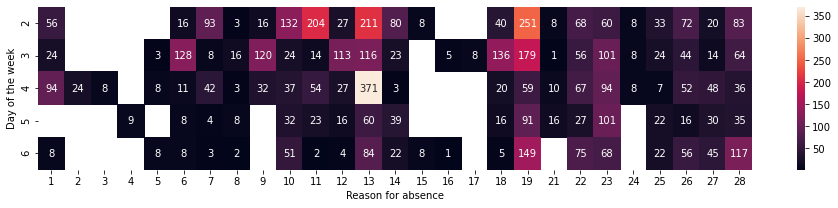

In [11]:
plt.figure(figsize = (16, 3))
sns.heatmap(data[data['Reason for absence'] != 0].groupby(['Day of the week', 'Reason for absence'])['Absenteeism time in hours'].sum().unstack(),  
            annot = True, fmt = 'g')
plt.show() 

### ABSENTEEISM TIME PER DAY OF THE WEEK AND TRANSPORTATION EXPENSE

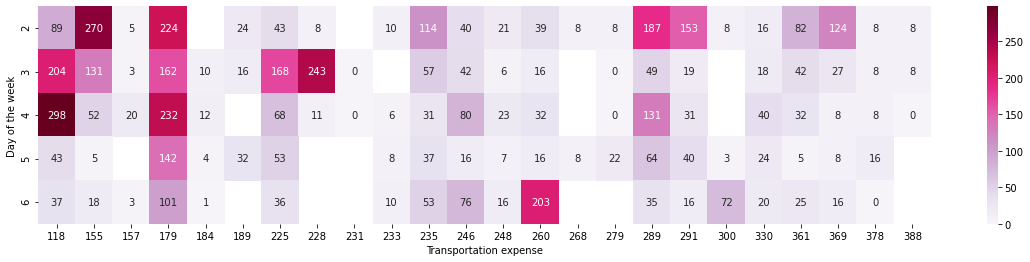

In [12]:
plt.figure(figsize = (20, 4))
sns.heatmap(data.groupby(['Day of the week', 'Transportation expense'])['Absenteeism time in hours'].sum().unstack(),  
            annot = True, fmt = 'g', cmap="PuRd")
plt.show()

### ABSENTEEISM TIME PER MONTH OF ABSENCE AND DISTANCE FROM RESIDENCE TO WORK

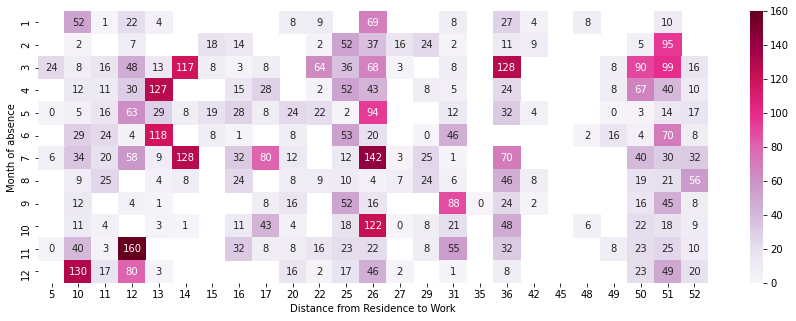

In [13]:
plt.figure(figsize = (15, 5))
sns.heatmap(data.groupby(['Month of absence', 'Distance from Residence to Work'])['Absenteeism time in hours'].sum().unstack()[1:13],  
            annot = True, fmt = 'g', cmap="PuRd")
plt.show()

### ABSENTEEISM TIME PER SERVICE TIME AND AGE

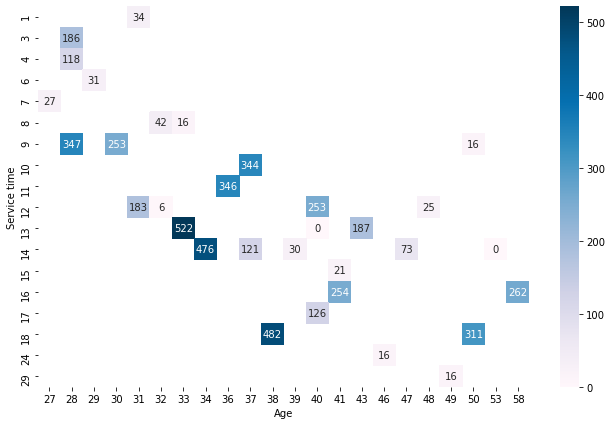

In [14]:
plt.figure(figsize = (11, 7))
sns.heatmap(data.groupby(['Service time', 'Age'])['Absenteeism time in hours'].sum().unstack(),  
            annot = True, fmt = 'g', cmap="PuBu")
plt.show()

### ABSENTEEISM TIME PER HIT TARGET AND AGE

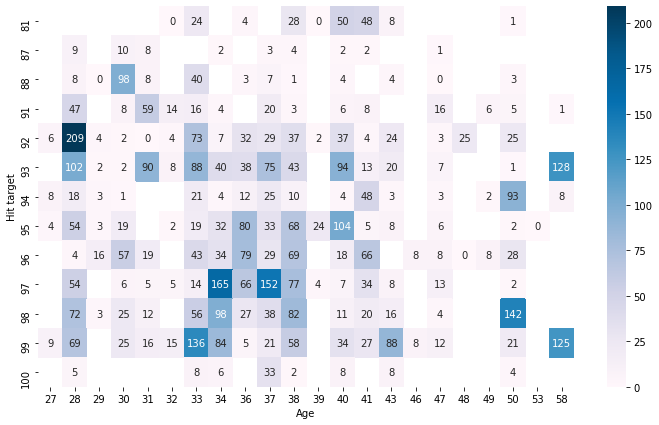

In [15]:
plt.figure(figsize = (12, 7))
sns.heatmap(data.groupby(['Hit target', 'Age'])['Absenteeism time in hours'].sum().unstack(),  
            annot = True, fmt = 'g', cmap="PuBu")
plt.show()

### ABSENTEEISM TIME PER AGE AND REASON

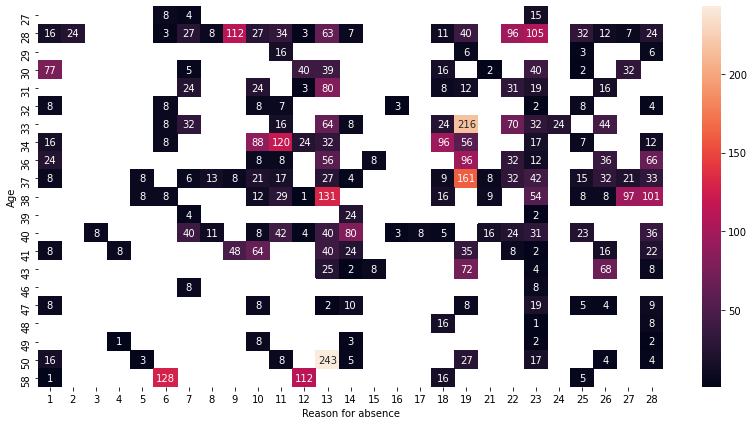

In [16]:
plt.figure(figsize = (14, 7))
sns.heatmap(data[data['Reason for absence'] != 0].groupby(['Age', 'Reason for absence'])['Absenteeism time in hours'].sum().unstack(),  
            annot = True, fmt = 'g')
plt.show()

### ABSENTEEISM TIME - SOCIAL DRINKER/SMOKER

In [17]:
drink_sum = data[(data['Social drinker']==True)&(data['Social smoker']==False)]['Absenteeism time in hours'].sum()
smok_sum = data[(data['Social drinker']==False)&(data['Social smoker']==True)]['Absenteeism time in hours'].sum()

drink_smok_sum = data[(data['Social drinker']==True)&(data['Social smoker']==True)]['Absenteeism time in hours'].sum()

abs_sum = data[(data['Social drinker']==False) & (data['Social smoker']==False)]['Absenteeism time in hours'].sum()

pie = go.Pie(labels=['Social drinker', 'Social smoker','Social drinker & Social smoker','No Social smoker/Social smoker'], 
             values=[drink_sum, smok_sum, drink_smok_sum, abs_sum], marker=dict(colors=px.colors.qualitative.Pastel1+px.colors.qualitative.Pastel2))
layout = go.Layout(title='ABSENTEEISM TIME - SOCIAL DRINKER/SMOKER')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

### ABSENTEEISM TIME - AGE AND BMI

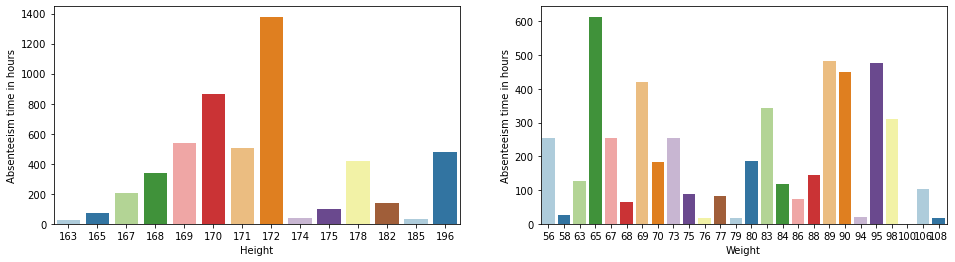

In [18]:
plt.figure(figsize = (16,4))
plt.subplot(1, 2, 1)
sns.barplot(data.groupby(['Height'])['Absenteeism time in hours'].sum().index, 
            data.groupby(['Height'])['Absenteeism time in hours'].sum(), palette="Paired")
plt.subplot(1, 2, 2)
sns.barplot(data.groupby(['Weight'])['Absenteeism time in hours'].sum().index, 
            data.groupby(['Weight'])['Absenteeism time in hours'].sum(), palette="Paired")
plt.show()

### ABSENTEEISM TIME - HEIGHT AND  WEIGHT

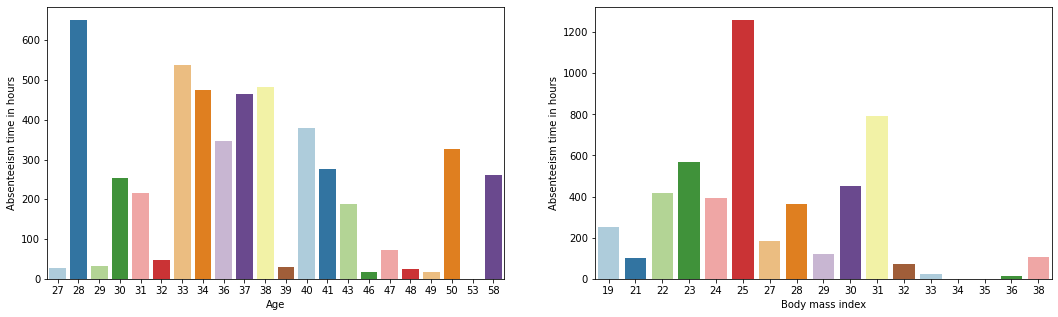

In [19]:
plt.figure(figsize = (18,5))
plt.subplot(1, 2, 1)
sns.barplot(data.groupby(['Age'])['Absenteeism time in hours'].sum().index, 
            data.groupby(['Age'])['Absenteeism time in hours'].sum(), palette="Paired")
plt.subplot(1, 2, 2)
sns.barplot(data.groupby(['Body mass index'])['Absenteeism time in hours'].sum().index, 
            data.groupby(['Body mass index'])['Absenteeism time in hours'].sum(), palette="Paired")
plt.show()

### ABSENTEEISM TIME - NUMBER OF PETS AND CHILDREN

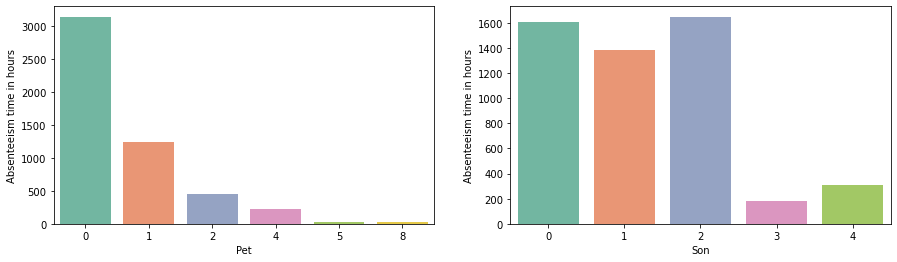

In [20]:
plt.figure(figsize = (15,4))
plt.subplot(1, 2, 1)
sns.barplot(data.groupby(['Pet'])['Absenteeism time in hours'].sum().index, 
            data.groupby(['Pet'])['Absenteeism time in hours'].sum(), palette="Set2")
plt.subplot(1, 2, 2)
sns.barplot(data.groupby(['Son'])['Absenteeism time in hours'].sum().index, 
            data.groupby(['Son'])['Absenteeism time in hours'].sum(), palette="Set2")
plt.show()

### ABSENTEEISM TIME - EDUCATION WISE

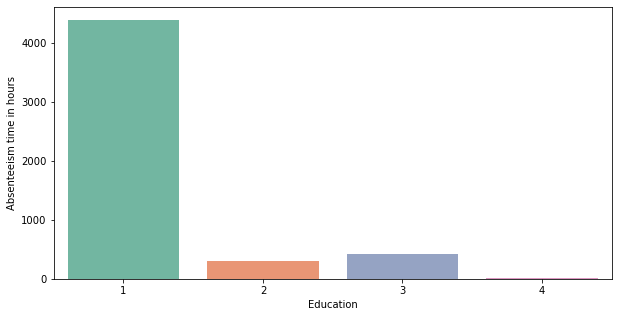

In [21]:
plt.figure(figsize = (10,5))

sns.barplot(data.groupby(['Education'])['Absenteeism time in hours'].sum().index, 
            data.groupby(['Education'])['Absenteeism time in hours'].sum(), palette="Set2")
plt.show()